# Problem 2
## Carter, Jake, and Anil

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#Load in data
#dummy data for now
data = np.zeros((391,1))
count = 0
for line in open('jetfunc.dat'):
    data[count] = line.split(" ")[0]
    count += 1


In [5]:
def midpoints(A):
    B = np.zeros((len(A)-1,1))
    for i in range(len(A)-1):
        B[i] = (A[i]+A[i+1])/2
    return B
def round_list(A,f):
    B = np.zeros((len(A),1))
    for i in range(len(A)):
        B[i] = round(A[i],f)
    return B


10


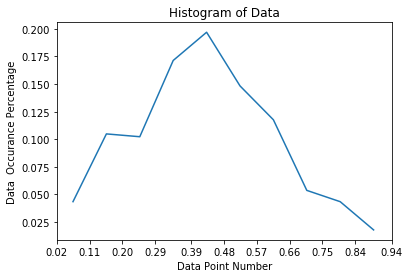

In [6]:
from scipy.stats import norm
#get histogram of values
Histo = np.histogram(data)
B = midpoints(Histo[1])
ticks = round_list(Histo[1],2)
Histo_percentage = Histo[0]/sum(Histo[0])
print(len(Histo_percentage))
plt.plot(B,Histo_percentage)
plt.title("Histogram of Data")
plt.xlabel("Data Point Number")
plt.ylabel("Data  Occurance Percentage");
plt.xticks(ticks);

In [7]:
def fitFunc(x,a,b):
    return (x**a)*(1-x)**b
def fitFunc2(x,a,b,c):
    return a*np.exp(-((x-b)**2)/2*c**2)

First we will use an optimization module in python to calculate the optimal values of a and b; afterward, we will search the parameter space about the optimized value and create a 2-dimensional chi-squared plot in the parameter space as a goodness-of-fit estimator.

In [8]:
def Residual(obs_data,theor_data):
    res_val = 0.0
    for i in range(len(obs_data)):
        res_val += np.sqrt(np.abs((obs_data[i]-theor_data[i])**2.))
    return res_val

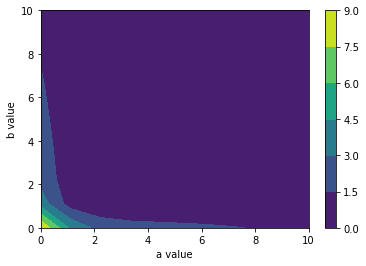

In [9]:
a_init = 0.0
a_final = 10.0
b_init = 0.0
b_final = 10.0
nm_steps = 10
a_step = (a_final-a_init)/nm_steps
b_step = (b_final-b_init)/nm_steps
ResidualValues = np.zeros((nm_steps,nm_steps))

for i in range(nm_steps):
    a = a_init + i*a_step
    for j in range(nm_steps):
        b = b_init + j*b_step
        obs_data = fitFunc(B,a,b)
        ResidualValues[i][j] = Residual(obs_data,Histo_percentage)
        
# Create the contour plot
CS = plt.contourf(np.linspace(a_init,a_final,nm_steps),np.linspace(b_init,b_final,nm_steps), ResidualValues)
plt.colorbar()  
plt.xlabel('a value')
plt.ylabel('b value');

In [10]:
a_init = 0.0
a_final = 10.0
b_init = 0.0
b_final = 10.0
c_init = 0.0
c_final = 10.0
nm_steps = 10
a_step = (a_final-a_init)/nm_steps
b_step = (b_final-b_init)/nm_steps
c_step = (c_final-c_init)/nm_steps
ResidualValues = np.zeros((nm_steps,nm_steps,nm_steps))
ResidualValuesFlat = np.zeros((nm_steps**3,1))
count = 0
x = []
y = []
z = []
for i in range(nm_steps):
    a = a_init + i*a_step
    for j in range(nm_steps):
        b = b_init + j*b_step
        for k in range(nm_steps):
            c = c_init + k*c_step
            x.append(a)
            y.append(b)
            z.append(c)
            obs_data = fitFunc2(B,a,b,c)
            ResidualValues[i][j][k] = Residual(obs_data,Histo_percentage)
            ResidualValuesFlat[count] = Residual(obs_data,Histo_percentage)
            count += 1

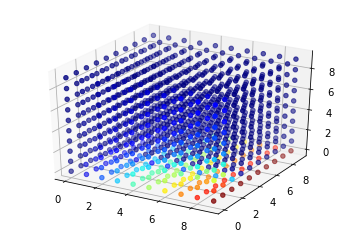

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.array(x),np.array(y),np.array(z),c=ResidualValuesFlat[:,0], cmap=plt.jet())
plt.show()